In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('C:/Users/Vilas/Downloads/Salary Prediction/Salary Prediction of Data Professions.csv')

In [3]:
print(data.head())

  FIRST NAME   LAST NAME SEX         DOJ CURRENT DATE DESIGNATION   AGE  \
0     TOMASA       ARMEN   F   5-18-2014   01-07-2016     Analyst  21.0   
1      ANNIE         NaN   F         NaN   01-07-2016   Associate   NaN   
2      OLIVE        ANCY   F   7-28-2014   01-07-2016     Analyst  21.0   
3     CHERRY     AQUILAR   F  04-03-2013   01-07-2016     Analyst  22.0   
4       LEON  ABOULAHOUD   M  11-20-2014   01-07-2016     Analyst   NaN   

   SALARY        UNIT  LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP  
0   44570     Finance         24.0               6.0      2.0         0  
1   89207         Web          NaN              13.0      NaN         7  
2   40955     Finance         23.0               7.0      3.0         0  
3   45550          IT         22.0               8.0      3.0         0  
4   43161  Operations         27.0               3.0      NaN         3  


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB
None


In [5]:
print(data.describe())

               AGE         SALARY  LEAVES USED  LEAVES REMAINING      RATINGS  \
count  2636.000000    2639.000000  2636.000000       2637.000000  2637.000000   
mean     24.756449   58136.678287    22.501517          7.503223     3.486159   
std       3.908228   36876.956944     4.604469          4.603193     1.114933   
min      21.000000   40001.000000    15.000000          0.000000     2.000000   
25%      22.000000   43418.000000    19.000000          4.000000     2.000000   
50%      24.000000   46781.000000    22.000000          8.000000     3.000000   
75%      25.000000   51401.500000    26.000000         11.000000     4.000000   
max      45.000000  388112.000000    30.000000         15.000000     5.000000   

          PAST EXP  
count  2639.000000  
mean      1.566881  
std       2.728416  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max      23.000000  


In [6]:
# Handling Missing Values
data.fillna(data.mean(numeric_only=True), inplace=True)

In [7]:
# Handling Missing Values
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [8]:
# Convert data types if necessary
data['DOJ'] = pd.to_datetime(data['DOJ'])
data['CURRENT DATE'] = pd.to_datetime(data['CURRENT DATE'])

# Univariate Analysis

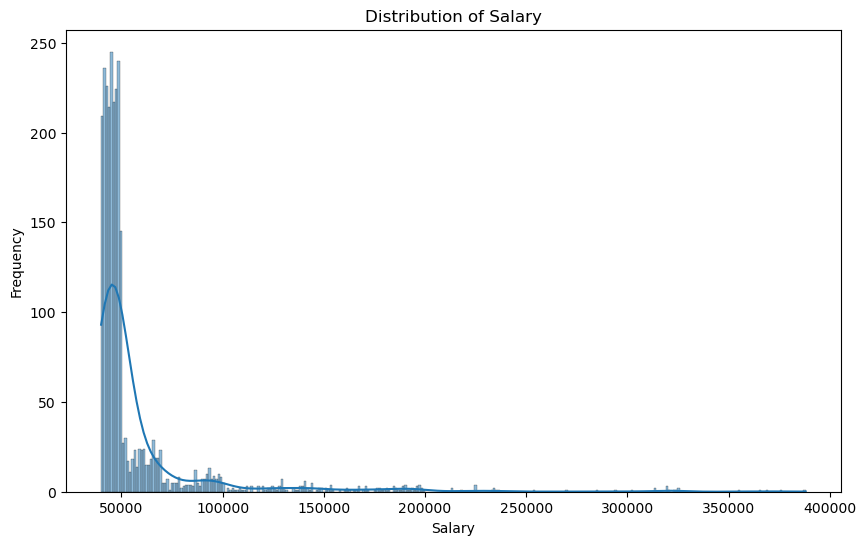

In [9]:
# Distribution of Salary
plt.figure(figsize=(10, 6))
sns.histplot(data['SALARY'], kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

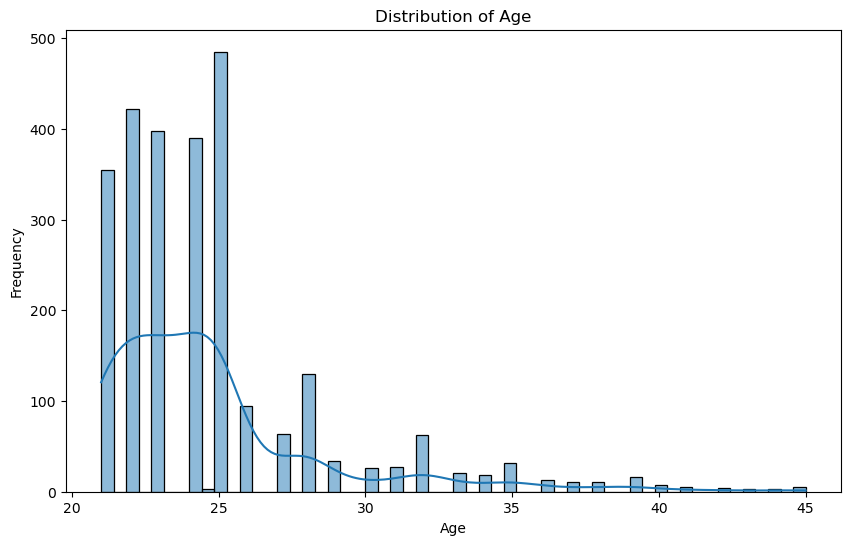

In [10]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['AGE'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

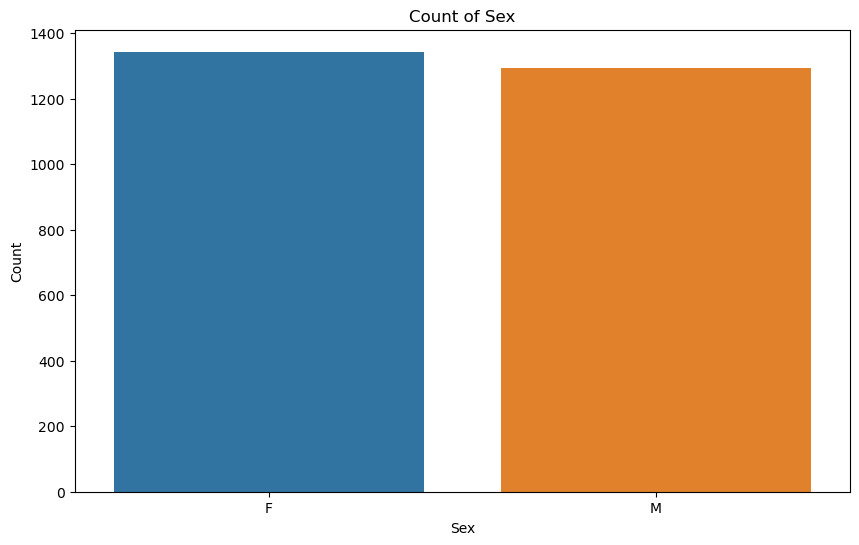

In [11]:
# Count plot of Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='SEX', data=data)
plt.title('Count of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis

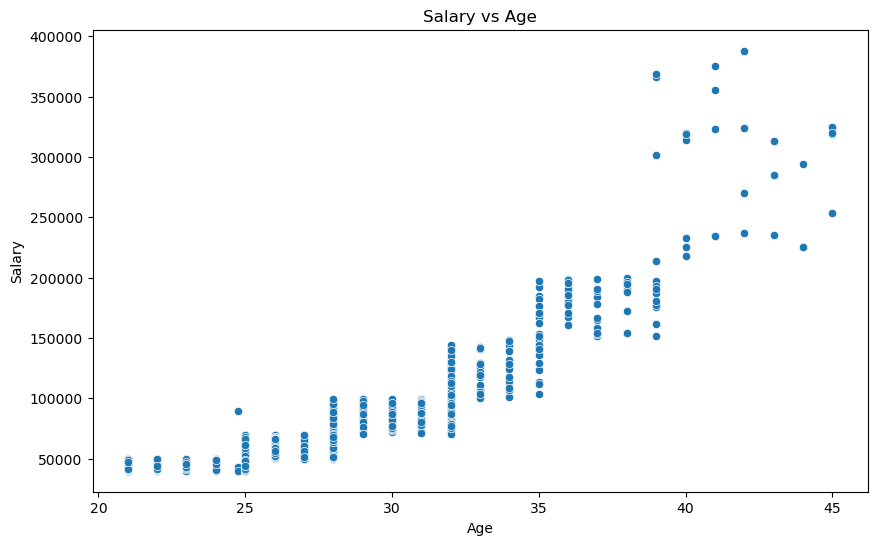

In [13]:
# Salary vs Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='SALARY', data=data)
plt.title('Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

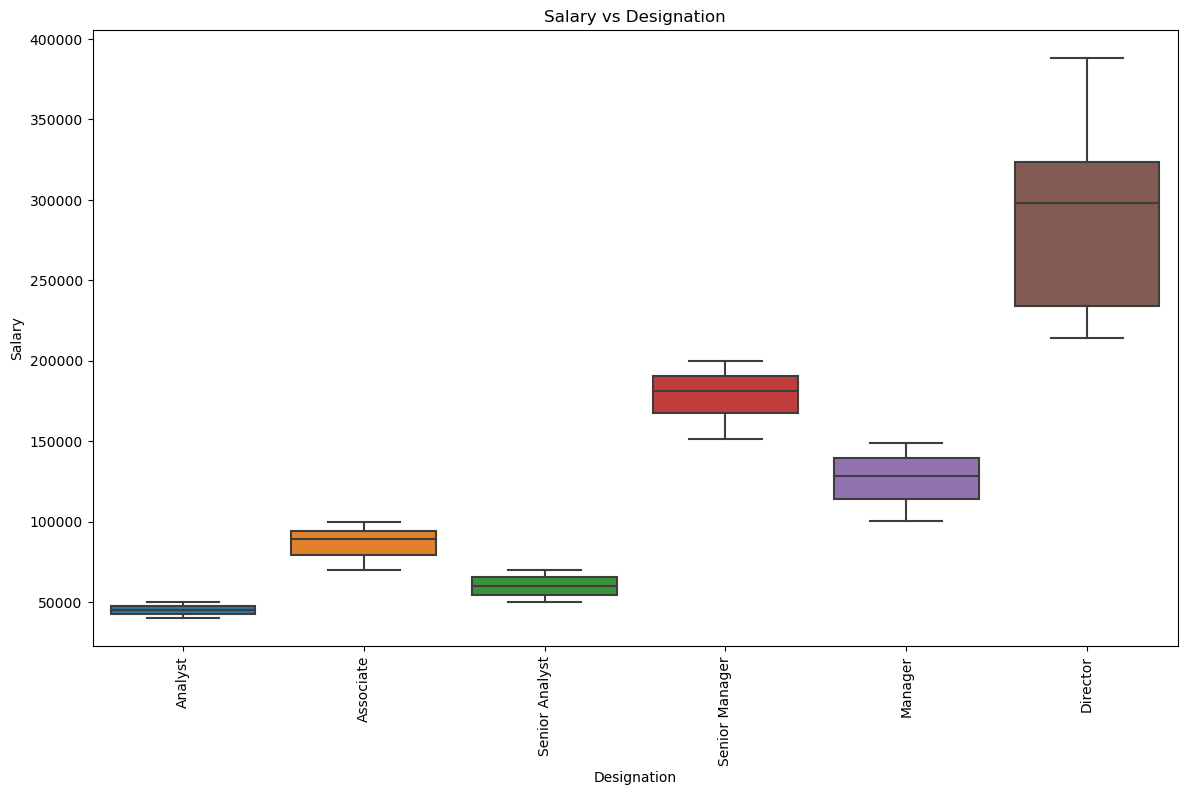

In [14]:
# Salary vs Designation
plt.figure(figsize=(14, 8))
sns.boxplot(x='DESIGNATION', y='SALARY', data=data)
plt.title('Salary vs Designation')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

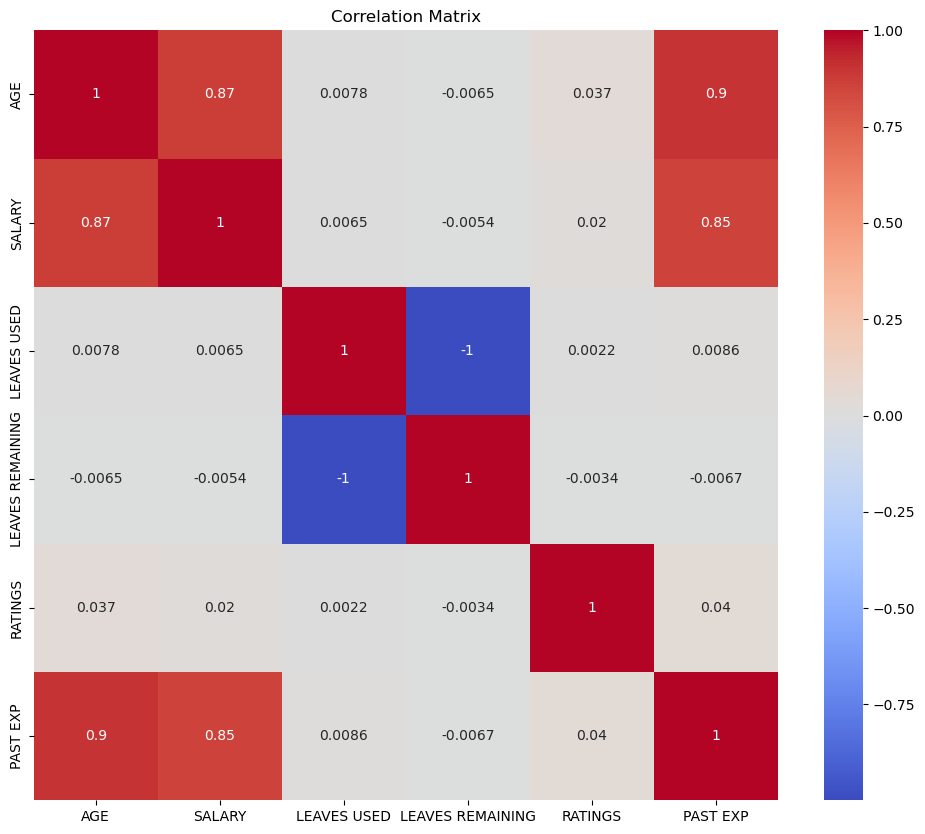

In [15]:
# Correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = data.corr(numeric_only=True)  # Specify numeric_only=True to avoid the warning
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Multivariate Analysis

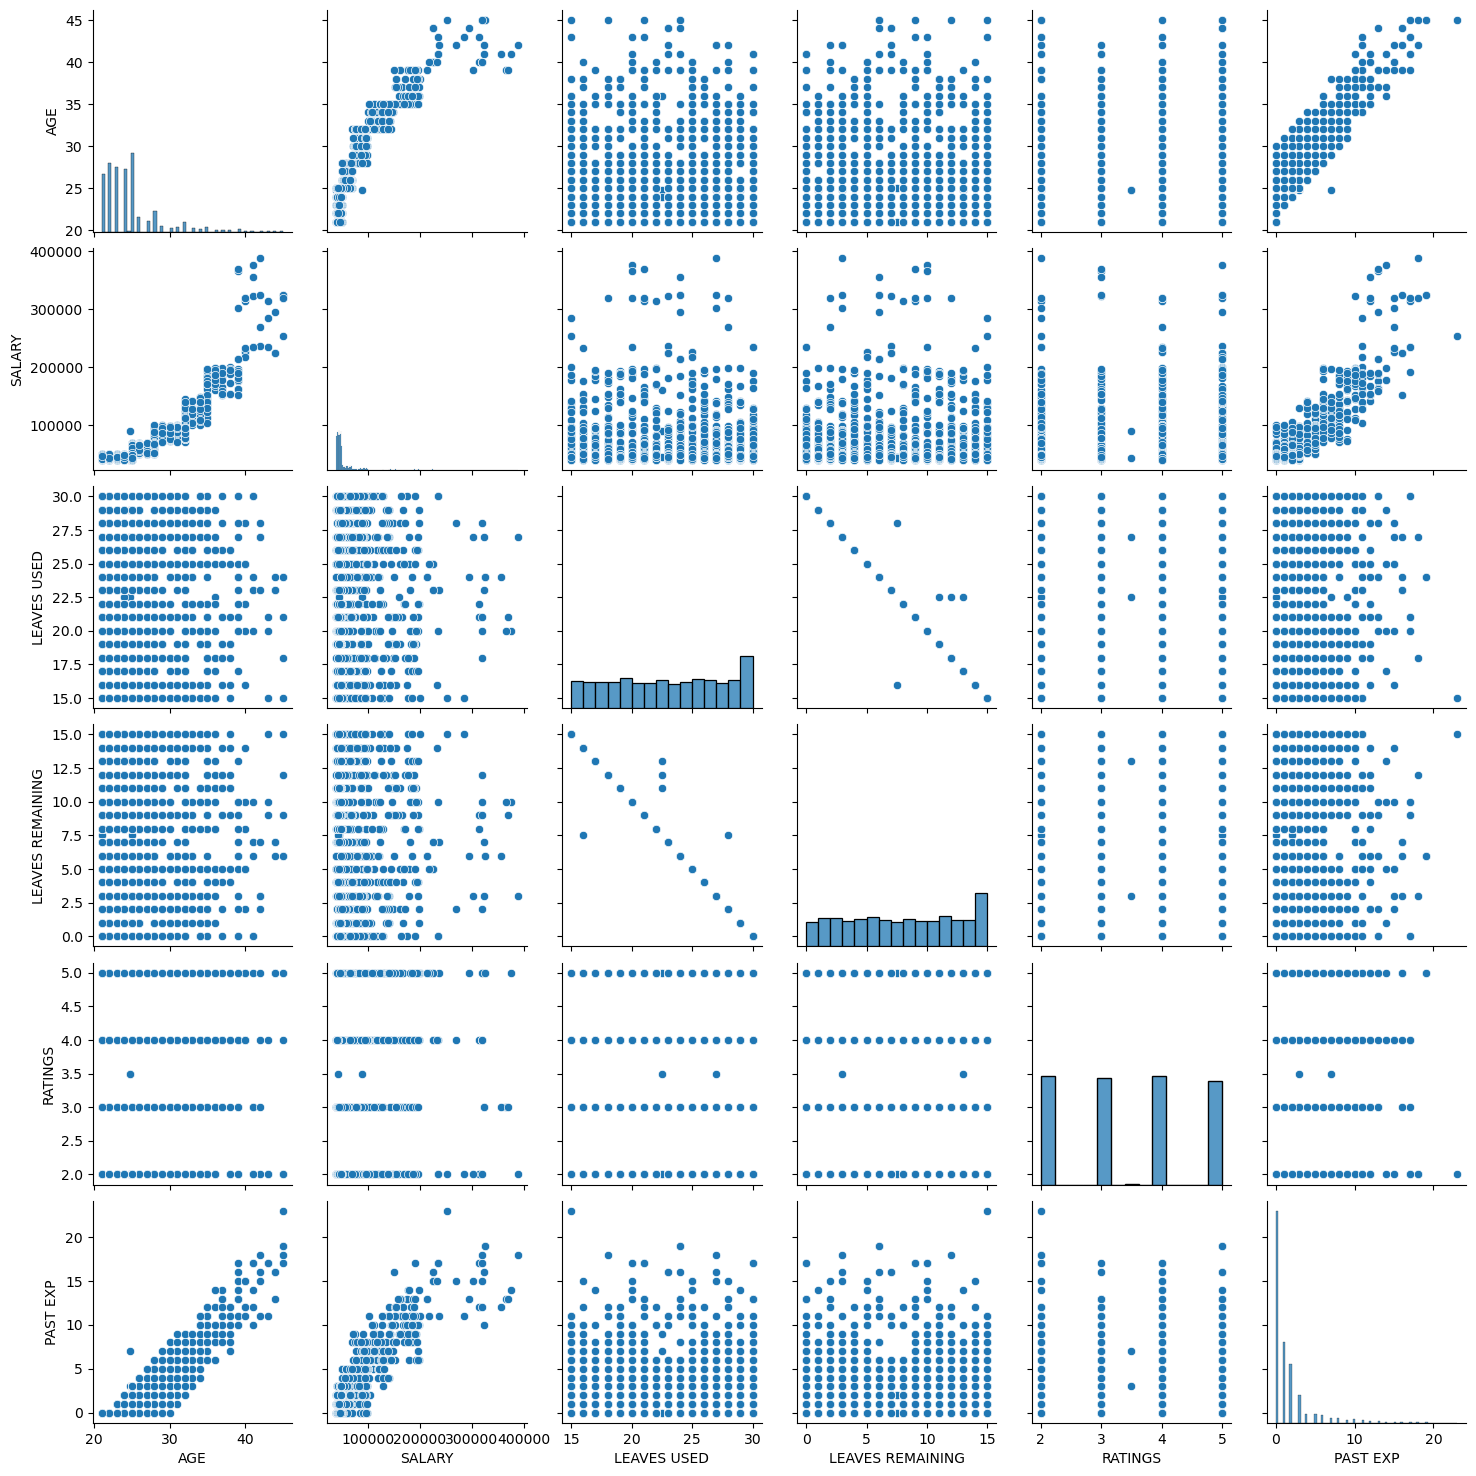

In [16]:
# Pairplot
sns.pairplot(data)
plt.show()

# Feature Engineering

In [17]:
# Length of service
data['SERVICE_LENGTH'] = (data['CURRENT DATE'] - data['DOJ']).dt.days / 365

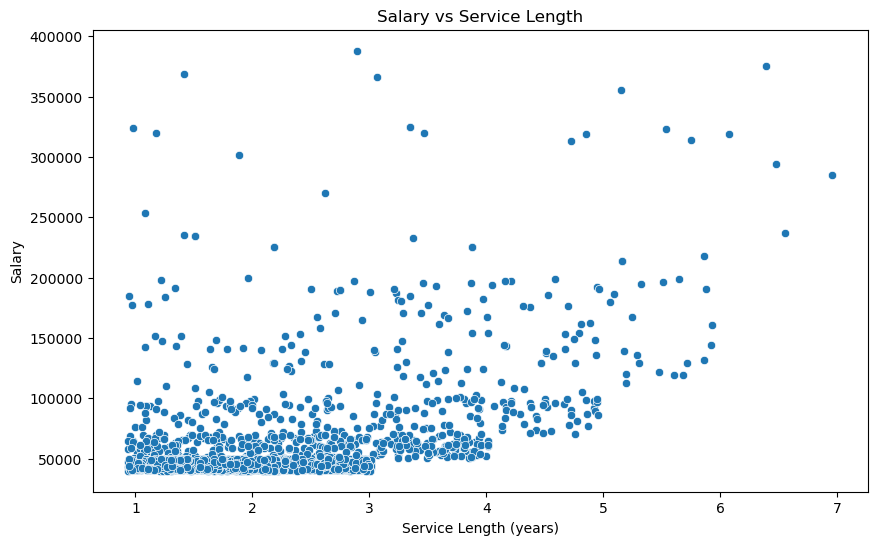

In [18]:
# Salary vs Service Length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SERVICE_LENGTH', y='SALARY', data=data)
plt.title('Salary vs Service Length')
plt.xlabel('Service Length (years)')
plt.ylabel('Salary')
plt.show()